In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import pickle
import csv
import operator
#import chart_studio.plotly as py
#from plotly.graph_objs import *
import re
import string
#from textblob import TextBlob
#import preprocessor as p
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.corpus import reuters

In [2]:
G = nx.read_gpickle("Our_Gragh_0.4Sim")

In [3]:
print(f"There are {G.number_of_nodes()} nodes and {G.number_of_edges()} edges present in the Graph")

There are 533 nodes and 1211 edges present in the Graph


In [4]:
colors_central_nodes = ['orange', 'red']
pos= nx.spring_layout(G,scale=1) #default to scale=1

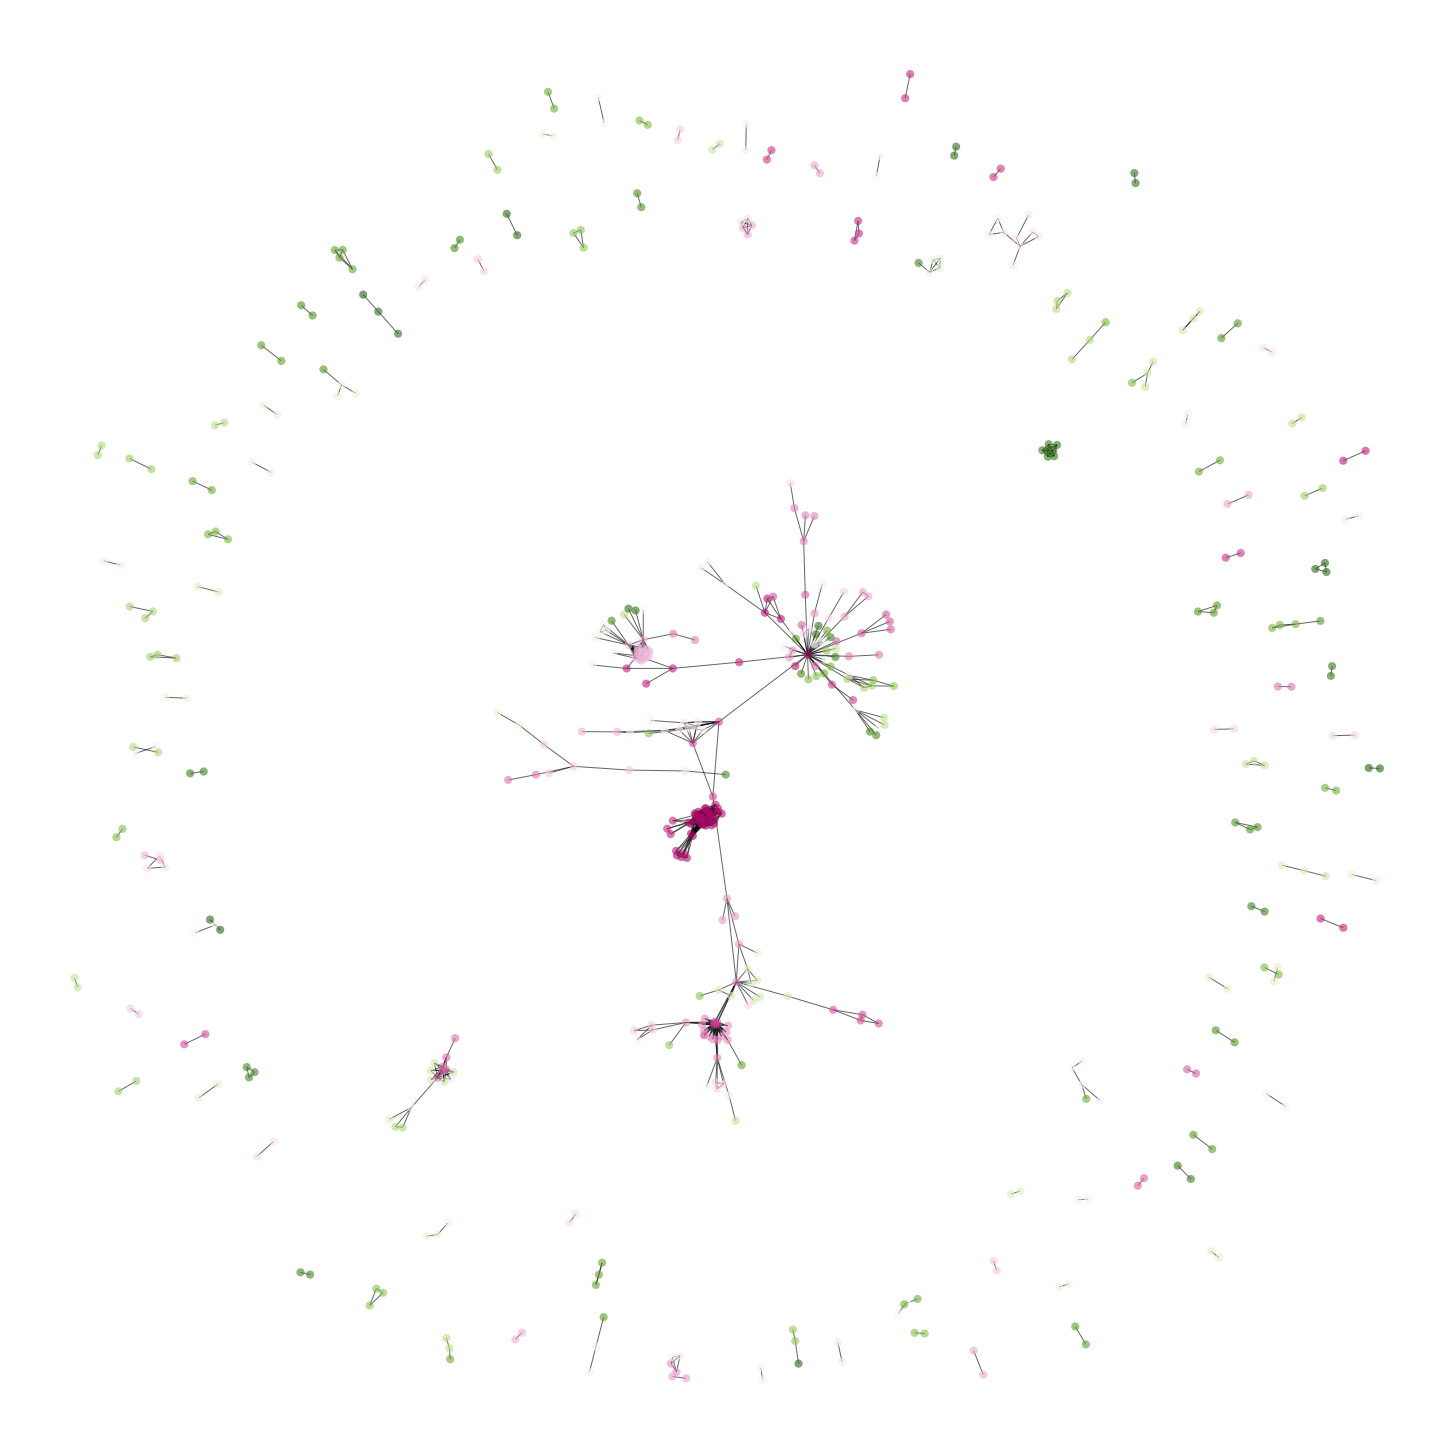

In [5]:
plt.figure(figsize = (20,20))
nx.draw(G, node_color=range(533), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
#plt.savefig('Our_Whole_Graph.png')
plt.show()

In [6]:
degrees = [val for (node, val) in G.degree()]

In [7]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

The maximum degree of the Graph is 40
The minimum degree of the Graph is 1


In [8]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")

The average degree of the nodes in the Graph is 4.5
The most frequent degree of the nodes found in the Graph is 1


In [9]:
if nx.is_connected(G):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


In [10]:
print(f"There are {nx.number_connected_components(G)} connected components in the Graph")

There are 124 connected components in the Graph


In [11]:
graph_centrality = nx.degree_centrality(G)
average_centrality= sum(graph_centrality.values()) /len(graph_centrality.values())
print("Gragh Aevarage Centrality :", average_centrality)

Gragh Aevarage Centrality : 0.008541522662190295


In [12]:
from statistics import mean
mean(graph_centrality.values())

0.008541522662190184

In [13]:
max_degree_centrality= max(graph_centrality.items(),  key=operator.itemgetter(1))
print(f"the node with id {max_degree_centrality[0]} has a degree centrality of {max_degree_centrality[1]} which is the maximum of the Graph")

the node with id 175351371 has a degree centrality of 0.07518796992481203 which is the maximum of the Graph


In [14]:
G_betweenness = nx.betweenness_centrality(G, normalized=True, endpoints=False)

In [15]:
average_betweeness= sum(G_betweenness.values()) /len(G_betweenness.values())
print("Gragh average betweeness centrality :", average_betweeness)

Gragh average betweeness centrality : 0.0008901744721243863


In [16]:
print(f"The average clustering coefficient is {nx.average_clustering(G)} in the Gragh")
print(f"The transitivity of the Gragh is {nx.transitivity(G)}")

The average clustering coefficient is 0.3582085958442235 in the Gragh
The transitivity of the Gragh is 0.7636696874045413


In [17]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
largest_subgraph = G.subgraph(Gcc[0])

In [18]:
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \edges present in the largest component of the Graph")

There are 168 nodes and 412 \edges present in the largest component of the Graph


In [19]:
all_diamters=[]
for comp in Gcc:
    diameter=nx.diameter(G.subgraph(comp))
    all_diamters.append(diameter)
max(all_diamters)

14

In [20]:
print("The diameter of the gragh is the maximum diamter of the subraph components: ",
      max(all_diamters))

The diameter of the gragh is the maximum diamter of the subraph components:  14


In [21]:
all_average_paths=[]
for comp in Gcc:
    avgLength=nx.average_shortest_path_length(G.subgraph(comp))
    all_average_paths.append(avgLength)
max(all_average_paths)

5.708368976333048

In [22]:
print("The average path length of the gragh is the maximum average path length of the subraph components: ",
      max(all_average_paths))

The average path length of the gragh is the maximum average path length of the subraph components:  5.708368976333048


In [23]:
#largest_subgraph analysis 

In [24]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [25]:
print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

The average clustering coefficient is 0.4127662230944733 in the largest subgraph
The transitivity of the largest subgraph is 0.659171597633136


In [26]:
print("The average path length of the largest component:", nx.average_shortest_path_length(largest_subgraph))

The average path length of the largest component: 5.708368976333048


In [27]:
print("The diameter of the largest component:", nx.diameter(largest_subgraph))

The diameter of the largest component: 14


In [28]:
print(f"The diameter of the largest subgraph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes in the largest subgraph is {nx.average_shortest_path_length(largest_subgraph):.2f}")

The diameter of the largest subgraph is 14
The average distance between any two nodes in the largest subgraph is 5.71


In [29]:
largest_subgraph_centrality = nx.degree_centrality(largest_subgraph)

In [30]:
#max_de = max(largest_subgraph_centrality.items())
max_de=max(largest_subgraph_centrality.items(), key=operator.itemgetter(1))

In [31]:
largest_subgraph_closeness = nx.closeness_centrality(largest_subgraph)

In [32]:
max_clo = max(largest_subgraph_closeness.items(), key=operator.itemgetter(1))

In [33]:
largest_subgraph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)

In [34]:
max_bet = max(largest_subgraph_betweenness.items(),key=operator.itemgetter(1))

In [35]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]} which is the maximum of the Graph")

the node with id 175351371 has a degree centrality of 0.23952095808383234 which is the maximum of the Graph
the node with id 175351371 has a closeness centrality of 0.29043478260869565 which is the maximum of the Graph
the node with id 175351371 has a betweenness centrality of 0.8026837890484092 which is the maximum of the Graph


In [36]:
largest_subgraph_average_centrality= sum(largest_subgraph_centrality.values()) /len(largest_subgraph_centrality.values())
print("largest_subgraph Average Centrality :", largest_subgraph_average_centrality)

largest_subgraph Average Centrality : 0.029369831765041293


In [37]:
largest_subgraph_average_betweeness= sum(largest_subgraph_betweenness.values()) /len(largest_subgraph_betweenness.values())
print("Largest_subgraph average betweeness centrality :", largest_subgraph_average_betweeness)

Largest_subgraph average betweeness centrality : 0.02836366853212678


In [38]:
#Ploting the loargest subragh 

In [39]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['red']

In [40]:
pos = nx.spring_layout(largest_subgraph, k=0.03)
colors = plt.cm.rainbow(np.linspace(0, 5, 168))

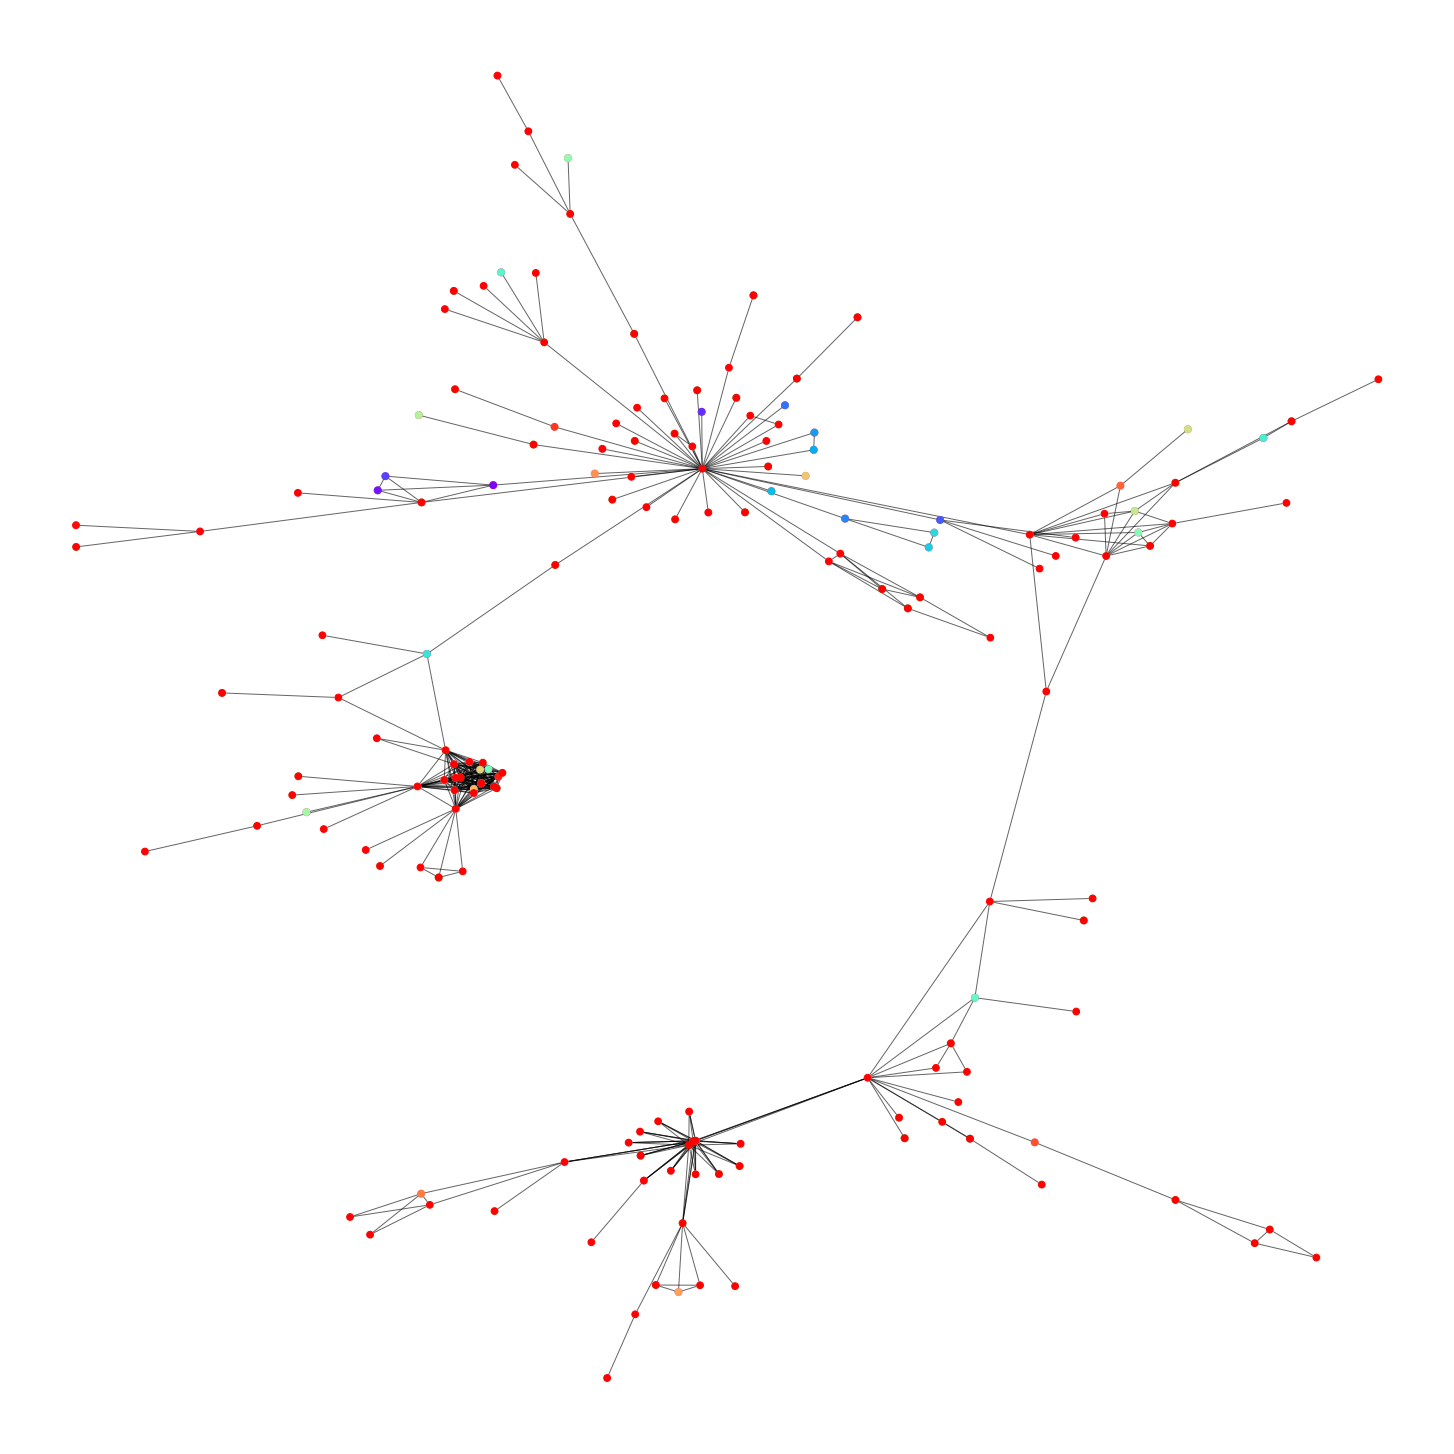

In [41]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(168), 
        cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3,
        node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos,
                        node_size=45,
                       node_color=colors)

#plt.savefig('Largest_subragh.png')
plt.show()
